In [1]:
Pkg.add("LightGraphs")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of LightGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using LightGraphs, TikzGraphs

 in depwarn(::String, ::Symbol) at deprecated.jl:64
 in readall(::String) at deprecated.jl:30
 in include_from_node1(::String) at loading.jl:488
 in include_from_node1(::String) at sys.dylib:?
 in eval(::Module, ::Any) at boot.jl:234
 in eval(::Module, ::Any) at sys.dylib:?
 in require(::Symbol) at loading.jl:415
 in require(::Symbol) at sys.dylib:?
 in include_string(::String, ::String) at loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at execute_request.jl:169
 in eventloop(::ZMQ.Socket) at eventloop.jl:8
 in (::IJulia.##9#15)() at task.jl:360
while loading /Users/dpsanders/.julia/v0.5/TikzGraphs/src/TikzGraphs.jl, in expression starting on line 5


## Draw AST (Abstract Syntax Tree)

In [3]:
function traverse!(g, labels, ex)

    top_vertex = add_vertex!(g)
    push!(labels, string("\\texttt{", ex.head, "}"))
    
    for i in 1:length(ex.args)
        if isa(ex.args[i], Expr)
            top = traverse!(g, labels, ex.args[i])
            add_edge!(g, top_vertex, top)
            
        else
            n = add_vertex!(g)
            add_edge!(g, top_vertex, n)
            
            if ex.args[i] == :(^)
                #push!(labels, "power")
                push!(labels, "\\textasciicircum")
            else
                
                push!(labels, string("\\texttt{", ex.args[i], "}"))
            end
        end
    end
    
    return top_vertex
    
end

traverse! (generic function with 1 method)

In [4]:
function draw_syntax_tree(ex::Expr)
    g = Graph()
    labels = String[]
    
    traverse!(g, labels, ex)
    
    TikzGraphs.plot(g, labels)
end

draw_syntax_tree (generic function with 1 method)

In [5]:
Pkg.checkout("TikzGraphs")

INFO: Checking out TikzGraphs master...
INFO: Pulling TikzGraphs latest master...
INFO: No packages to install, update or remove


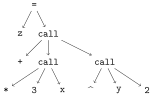

In [34]:
ex = :(z = 3x + y^2)
draw_syntax_tree(ex)

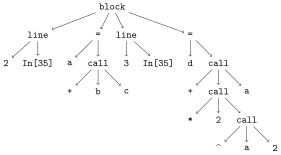

In [35]:
ex = quote
    a = b + c
    d = 2a^2 + a
end
draw_syntax_tree(ex)